In [2]:
import math
import cv2
from matplotlib import pyplot as plt
import spectrometer_functions as sf
import numpy as np

# Taking pictures with your camera

In [37]:
test_img = cv2.imread("waiting_for_the_bus.jpg")

In [38]:
test_img_rgb = cv2.cvtColor(test_img,cv2.COLOR_BGR2RGB)

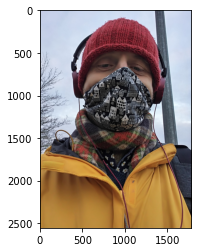

In [39]:
plt.imshow(test_img_rgb)

In [ ]:
test_img[1215]

In [40]:
test_img_rgb[2500,500]

array([180, 132,  58], dtype=uint8)

# Angular FOV of camera

Measuring the FOV by photographing an object of known width at known distance.

In [2]:
width = 150
distance = 114
angle = 2 * math.atan(width / (2 * distance))

In [3]:
print(math.degrees(angle))

66.68141469295401


## Working out pixels per radian

In [6]:
fov_image = cv2.imread("window.jpg")

In [4]:
height_px , width_px = fov_image.shape

In [7]:
radians_per_pixel = angle / width_px

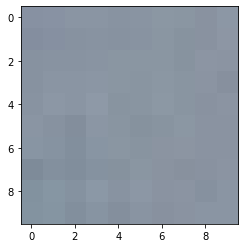

In [11]:
plt.imshow(fov_image[500:510,1000:1010])

In [27]:
print(np.matrix(fov_image[500:510,1000:1010,2]))

[[162 163 163 163 161 162 163 162 160 165]
 [159 161 160 161 160 161 162 159 160 164]
 [160 161 161 162 162 162 162 159 163 162]
 [160 163 163 164 162 161 163 161 162 158]
 [161 165 163 167 160 161 164 161 160 162]
 [163 160 156 164 161 158 160 163 161 161]
 [163 161 157 163 162 160 161 162 161 161]
 [153 158 156 160 158 162 160 158 160 162]
 [159 163 160 166 161 165 161 162 159 163]
 [160 162 157 162 157 162 159 161 163 163]]


# Read in a spectrum photo

In [8]:
s1 = cv2.imread("spec-ibl-auto.jpg")

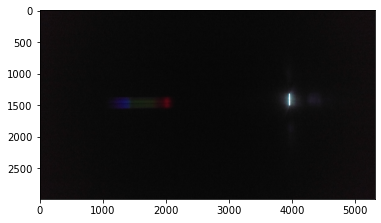

In [9]:
plt.imshow(s1)

In [10]:
b1 = [p[0] for p in s1[1452]]
g1 = [p[1] for p in s1[1452]]
r1 = [p[2] for p in s1[1452]]

In [24]:
wvlb,sb1 = sf.get_spectrum(b1,1e-6,radians_per_pixel)
wvlg,sg1 = sf.get_spectrum(g1,1e-6,radians_per_pixel)
wvlr,sr1 = sf.get_spectrum(r1,1e-6,radians_per_pixel)

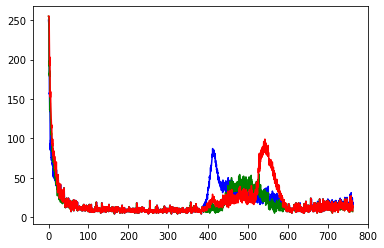

In [26]:
plt.plot(wvlb,sb1,'b-')
plt.plot(wvlg,sg1,'g-')
plt.plot(wvlr,sr1,'r-')

In [38]:
sgrey = [float(r) + float(g) + float(b) for r,g,b in zip(sr1,sg1,sb1)]

In [39]:
wvlgrey = [w1 for w1,w2,w3 in zip(wvlr,wvlg,wvlb)]

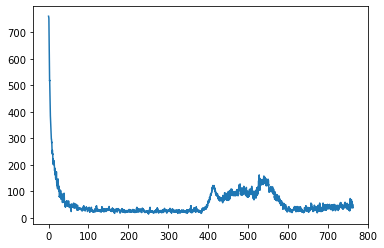

In [40]:
plt.plot(wvlgrey,sgrey)